<a href="https://colab.research.google.com/github/mugesram/Point-Operations-Spatial-Filtering/blob/main/Assignment_1_vision_Q34.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

indensity transformation

In [64]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from skimage import color

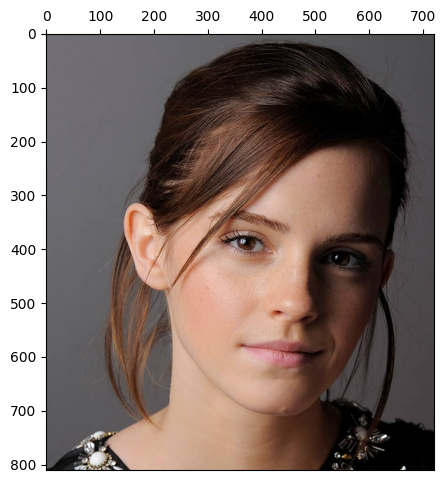

In [ ]:
# Reading Image
image = cv.imread("/content/drive/MyDrive/Vision/Assignment-1/emma.jpg")

fix,ax = plt.subplots(1,1,figsize=(5,8))
ax.imshow(cv.cvtColor(image,cv.COLOR_BGR2RGB))
ax.xaxis.set_ticks_position('top')
ax.yaxis.set_ticks_position('left')
plt.show()

256


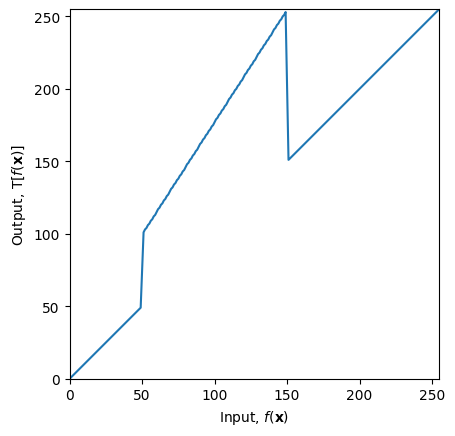

In [ ]:
# Making transform function
t1 = np.linspace(0,50,51)
t2 = np.linspace(100,255,101)
t3 = np.linspace(150,255,106)
t1[-1] = (t1[-1] + t2[0])/2
t2 = np.delete(t2,0)
t2[-1] = (t2[-1] + t3[0])/2
t3 = np.delete(t3,0)
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
print(len(transform))
fig,ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.show()

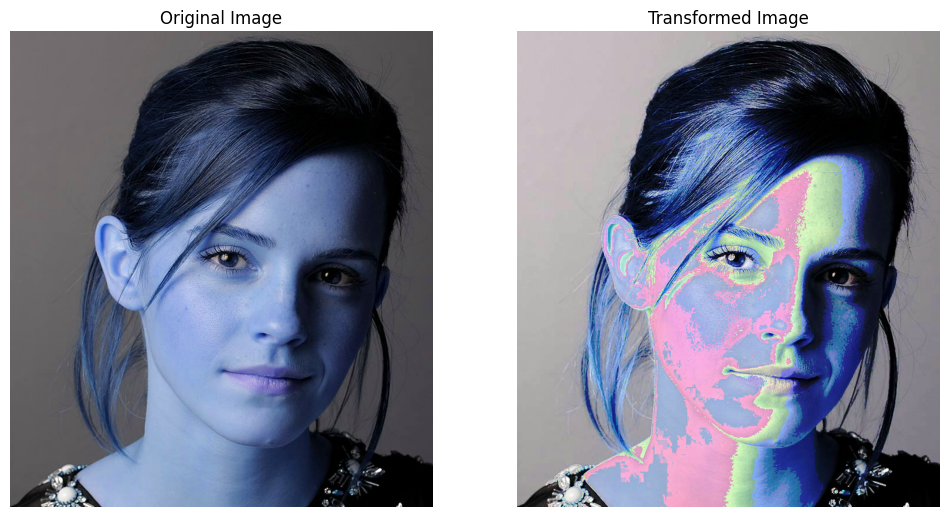

In [ ]:
# implementing transformation
transformed_image = cv.LUT(image, transform)

fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[1].imshow(transformed_image)
ax[1].set_title('Transformed Image')
for a in ax:
    a.axis('off')
plt.show()

Brain Image Analysis

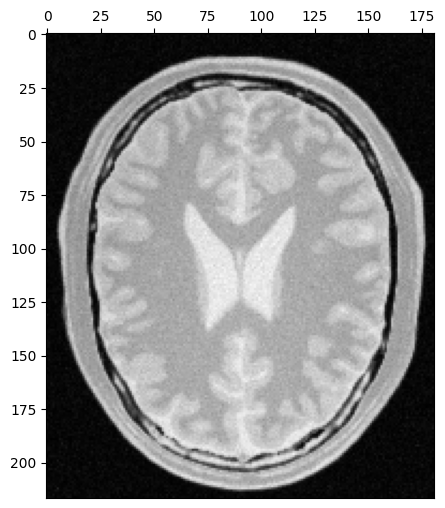

(217, 181, 3)

In [ ]:
# Reading Image
image = cv.imread("/content/drive/MyDrive/Vision/Assignment-1/brain_proton_density_slice.png")

fix,ax = plt.subplots(1,1,figsize=(5,8))
cvt_img = cv.cvtColor(image,cv.COLOR_BGR2RGB)
ax.imshow(cvt_img)
ax.xaxis.set_ticks_position('top')
ax.yaxis.set_ticks_position('left')
plt.show()
cvt_img.shape


In [ ]:
# need to find intensity ranges of each matters
# finding Idensity range of grey matters
min = 255
max = 0
total = np.uint32(0)
n = 0
for i in range(110,120):
  for j in range(50,55):
    v = np.uint32(cvt_img[i][j][0])
    total += v
    n += 1
    if min > v:
      min = v
    if max < v:
      max = v
print(min,max)
print(total/n)

158 191
169.4


In [ ]:
# finding Indensity range of white matters
min = 255
max = 0
total = np.uint32(0)
n = 0
for i in range(50,55):
  for j in range(45,50):
    v = np.uint32(cvt_img[i][j][0])
    total += v
    n += 1
    if min > v:
      min = v
    if max < v:
      max = v
print(min,max)
print(total/n)

168 192
180.76


In [ ]:
cvt_img[100][75]

array([230, 230, 230], dtype=uint8)

white matters 180-200, grey matter 150-175

In [ ]:
# accentuating white matter
lb = 150
ub = 175
t1 = np.array([0]*lb)
t2 = np.linspace(lb,ub,ub-lb)
t3 = np.array([0]*(256-ub))
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
print(len(transform))

256


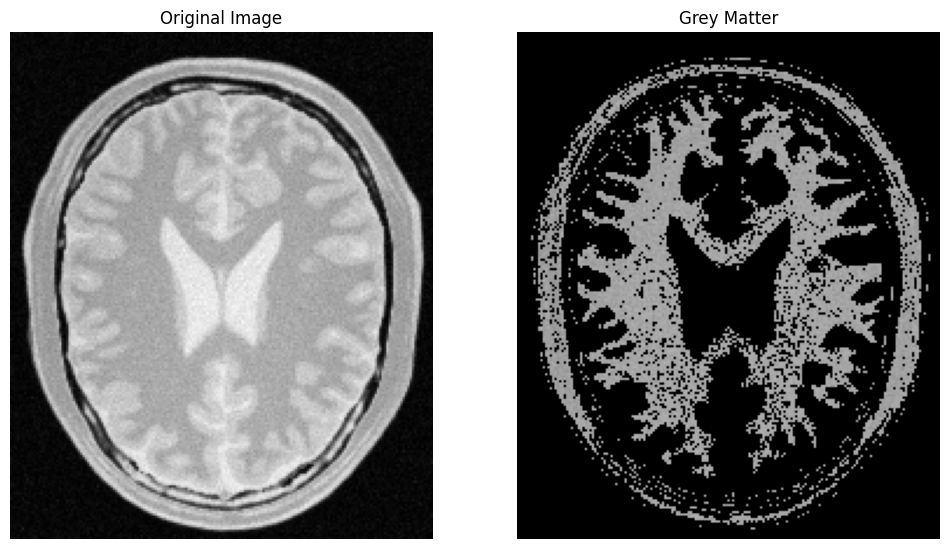

In [ ]:
transformed_image = cv.LUT(cvt_img, transform)

fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(cvt_img)
ax[0].set_title('Original Image')
ax[1].imshow(transformed_image)
ax[1].set_title('Grey Matter')
for a in ax:
    a.axis('off')
plt.show()

In [ ]:
# accentuating grey matter
lb = 180
ub = 210
t1 = np.array([0]*lb)
t2 = np.linspace(lb,ub,ub-lb)
t3 = np.array([0]*(256-ub))
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
print(len(transform))

256


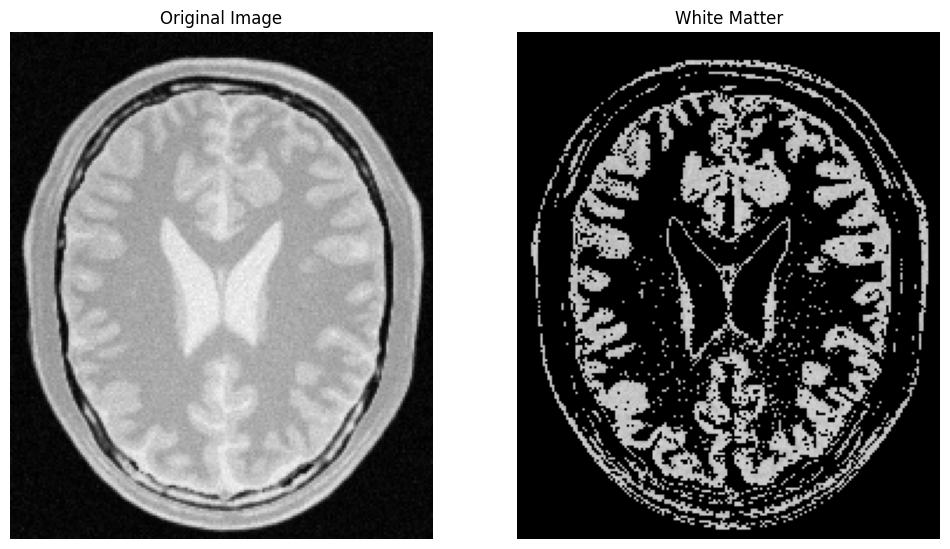

In [ ]:
transformed_image = cv.LUT(cvt_img, transform)

fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(cvt_img)
ax[0].set_title('Original Image')
ax[1].imshow(transformed_image)
ax[1].set_title('White Matter')
for a in ax:
    a.axis('off')
plt.show()

Final Range After Test  :   white matters 180-210, grey matter 150-175

Gamma Correction

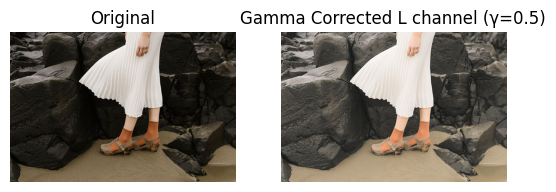

In [65]:
def gamma_correction_Lab(image, gamma=0.5):
  # norm of the img
    img_float = image / 255.0

    # L range 0,100
    lab = color.rgb2lab(img_float)

    # get L channel
    L = lab[:, :, 0]

    L_norm = L / 100.0
    L_corrected = np.power(L_norm, gamma)
    lab[:, :, 0] = L_corrected * 100
    rgb_corrected = color.lab2rgb(lab)
    rgb_corrected = np.clip(rgb_corrected, 0, 1)
    rgb_corrected_uint8 = (rgb_corrected * 255).astype(np.uint8)

    return rgb_corrected_uint8


image_bgr = cv.imread("/content/drive/MyDrive/Vision/Assignment-1/highlights_and_shadows.jpg")

image_rgb = cv.cvtColor(image_bgr, cv.COLOR_BGR2RGB)


gamma_val = 0.5
corrected_image = gamma_correction_Lab(image_rgb, gamma=gamma_val)


plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f'Gamma Corrected L channel (γ={gamma_val})')
plt.imshow(corrected_image)
plt.axis('off')

plt.show()


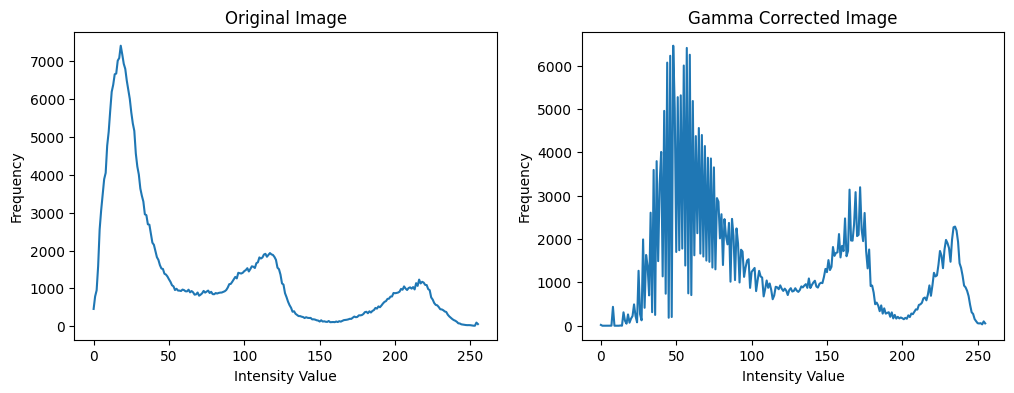

In [67]:
corrected_gray = cv.cvtColor(corrected_image, cv.COLOR_RGB2GRAY)
original_gray = cv.cvtColor(image_rgb, cv.COLOR_RGB2GRAY)
hist_cr, bins_cr = np.histogram(corrected_gray.ravel(), 256, [0, 256])
hist_or, bins_or = np.histogram(original_gray.ravel(), 256, [0, 256])
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(hist_or)
ax[0].set_title('Original Image')
ax[0].set_xlabel('Intensity Value')
ax[0].set_ylabel('Frequency')
ax[1].plot(hist_cr)
ax[1].set_title('Gamma Corrected Image')
ax[1].set_xlabel('Intensity Value')
ax[1].set_ylabel('Frequency')
plt.show()

White ness off Corrected picture increased because of the use of y=0.5 in maps the naroow dark band to wider range show small chnage in higher intensity . sudden reduction in lower intensity and increse in higher intensity pixels.

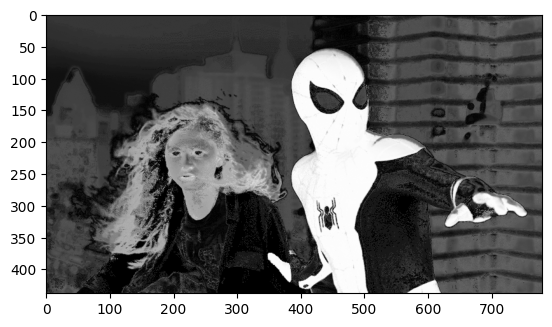

In [104]:
# HSV intensity transformation - 4
image_bgr = cv.imread('/content/drive/MyDrive/Vision/Assignment-1/spider.png')
image_rgb = cv.cvtColor(image_bgr, cv.COLOR_BGR2RGB)

hsv_image = cv.cvtColor(image_bgr, cv.COLOR_BGR2HSV)

# Split into channels
h, s, v = cv.split(hsv_image)
a = 0.55

x = np.arange(256)
t = x + a * 128 * np.exp(-((x - 128)**2) / (2 * 70 * 70))
t = np.clip(t, 0, 255).astype(np.uint8)

s_tr = cv.LUT(s, t)
plt.imshow(s_tr, cmap='gray')

array([[[161, 190, 205],
        [163, 188, 203],
        [161, 188, 204],
        ...,
        [ 95, 113, 122],
        [ 89, 109, 120],
        [ 84, 106, 118]],

       [[160, 192, 211],
        [160, 192, 211],
        [160, 192, 211],
        ...,
        [ 84, 101, 108],
        [ 83,  98, 104],
        [ 80,  94, 104]],

       [[160, 192, 211],
        [160, 192, 211],
        [160, 192, 211],
        ...,
        [ 65,  79,  90],
        [ 65,  78,  87],
        [ 66,  76,  83]],

       ...,

       [[ 58,  60,  69],
        [ 58,  61,  68],
        [ 55,  61,  71],
        ...,
        [ 36,  45,  55],
        [ 36,  45,  55],
        [ 35,  46,  56]],

       [[ 50,  57,  67],
        [ 49,  56,  66],
        [ 53,  57,  65],
        ...,
        [ 33,  42,  52],
        [ 32,  41,  51],
        [ 33,  42,  52]],

       [[ 46,  53,  64],
        [ 50,  52,  60],
        [ 43,  52,  61],
        ...,
        [ 31,  40,  50],
        [ 31,  40,  50],
        [ 31,  40,  50]]], dtype=uint8)
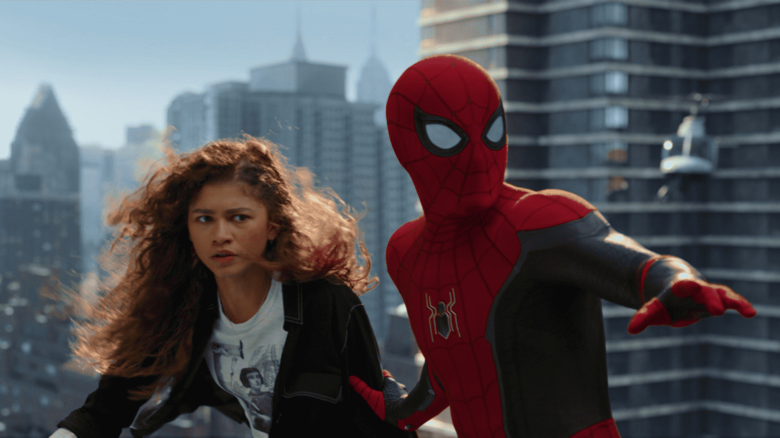

In [105]:
hsv_merged = cv.merge((h, s_tr, v))

rgb_merged = cv.cvtColor(hsv_merged, cv.COLOR_HSV2RGB)
rgb_merged


array([[[182, 197, 205],
        [182, 195, 203],
        [182, 196, 204],
        ...,
        [107, 117, 122],
        [103, 114, 120],
        [ 99, 111, 118]],

       [[184, 201, 211],
        [184, 201, 211],
        [184, 201, 211],
        ...,
        [ 95, 104, 108],
        [ 93, 101, 104],
        [ 91,  99, 104]],

       [[184, 201, 211],
        [184, 201, 211],
        [184, 201, 211],
        ...,
        [ 76,  84,  90],
        [ 75,  82,  87],
        [ 74,  79,  83]],

       ...,

       [[ 64,  65,  69],
        [ 64,  65,  68],
        [ 63,  66,  71],
        ...,
        [ 44,  49,  55],
        [ 44,  49,  55],
        [ 44,  50,  56]],

       [[ 58,  62,  67],
        [ 57,  61,  66],
        [ 59,  61,  65],
        ...,
        [ 41,  46,  52],
        [ 40,  45,  51],
        [ 41,  46,  52]],

       [[ 54,  58,  64],
        [ 55,  56,  60],
        [ 51,  56,  61],
        ...,
        [ 39,  44,  50],
        [ 39,  44,  50],
        [ 39,  44,  50]]], dtype=uint8)
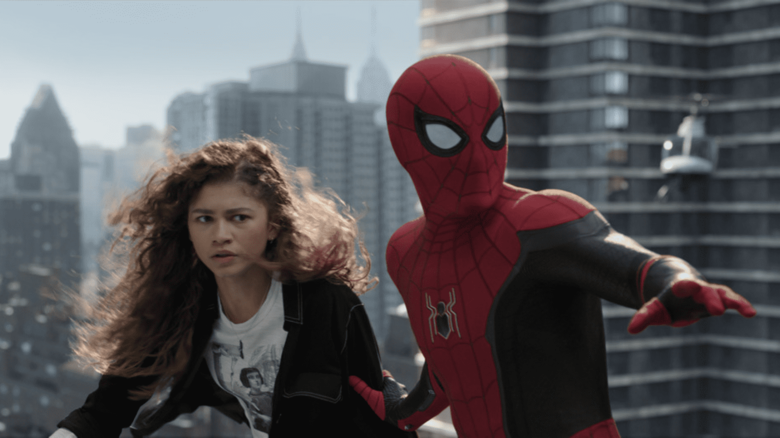

In [97]:
image_rgb

After testing a = 0.55 makes image looks more pleasing

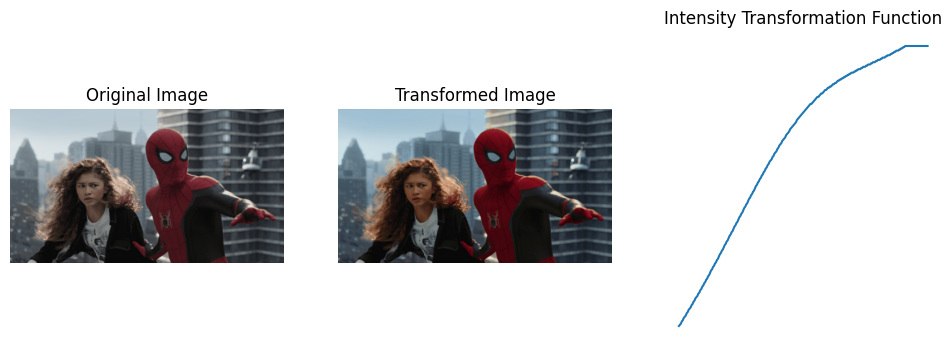

In [106]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(image_rgb)
ax[0].set_title('Original Image')
ax[1].imshow(rgb_merged)
ax[1].set_title('Transformed Image')
ax[2].plot(t)
ax[2].set_title('Intensity Transformation Function')
ax[2].set_xlabel('Input Intensity')
ax[2].set_ylabel('Output Intensity')
for a in ax:
    a.axis('off')
plt.show()